In [1]:
import os
import pandas as pd
import numpy as np
import re
import pickle
from scf_impute import analysis_variables, scoring
from scipy import stats
import matplotlib
import missingno as msno
%matplotlib inline

In [2]:
DATA_FOLDER = 'data'

In [3]:
dct_param = {'data': os.path.join('..', 'data'),
             'missing_val': 'nan'}
with open(os.path.join(DATA_FOLDER, 'variables.pickle'), 'rb') as handle:
        dct_data = pickle.load(handle)

# Missing patterns exploration

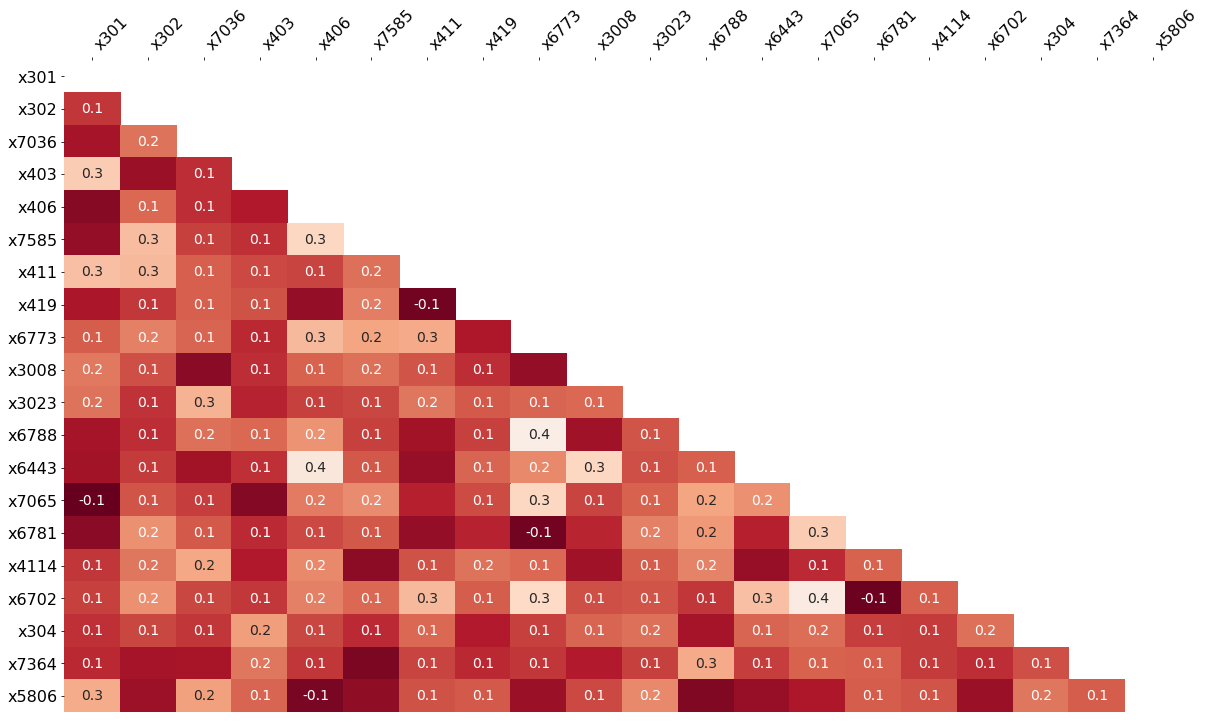

In [4]:
df_raw_data = dct_data['df_raw_data']
filtered_data = msno.nullity_filter(df_raw_data, filter='bottom', n=50, p=0.9)
msno.heatmap(filtered_data)

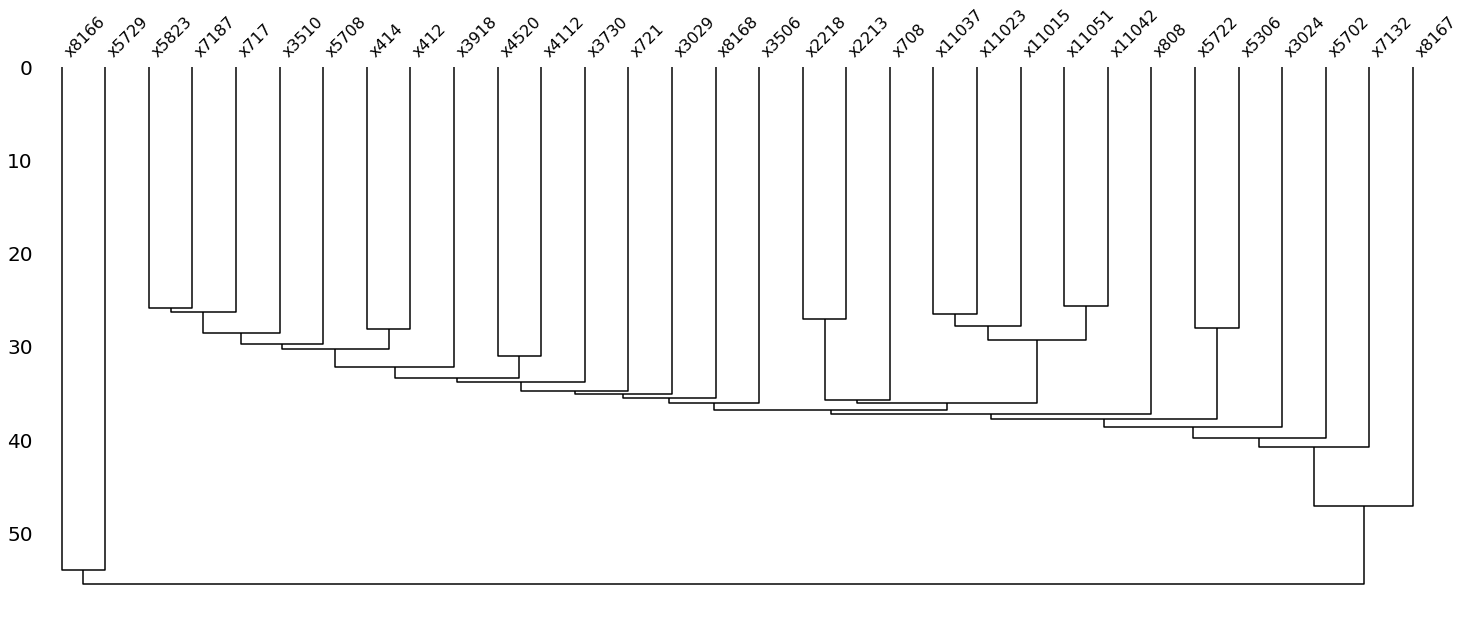

In [5]:
filtered_data = msno.nullity_filter(df_raw_data, filter='bottom', p=0.9)
msno.dendrogram(filtered_data)

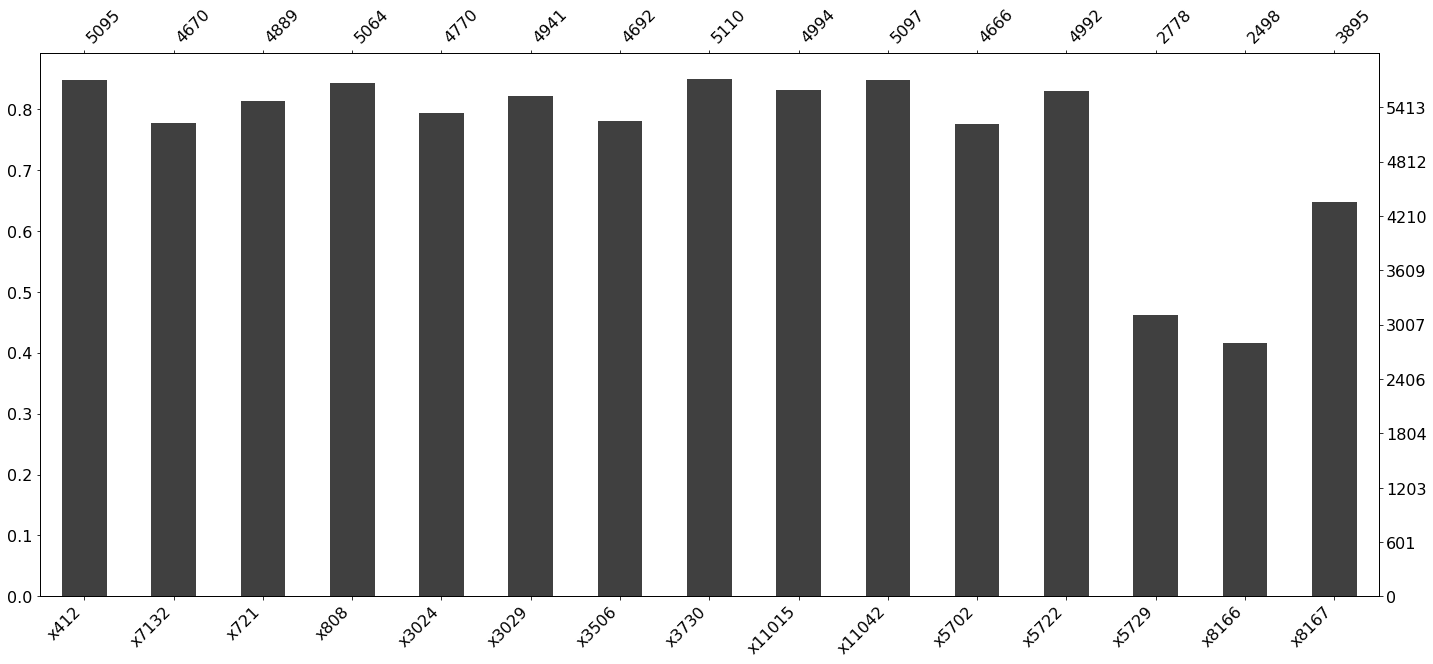

In [6]:
filtered_data = msno.nullity_filter(df_raw_data, filter='bottom', n=15, p=0.99) # or filter='top'
msno.bar(filtered_data)

# MSE Calculation

In [4]:
df_imputed_1 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'xgboost_imputed_100.csv'), 1)
y, mse_1 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed_1, dct_data['lst_num_cols'], dct_data['df_removed'])
y, m_accuracy_1 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed_1, dct_data['lst_char_cols'], dct_data['df_removed'])

Number of columns to be imputed: 1210
Number of columns to be imputed: 1210


KeyboardInterrupt: 

In [23]:
df_imputed_2 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'xgboost_imputed_2.csv'), 2)
y, mse_2 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed_2, dct_data['lst_num_cols'], dct_data['df_removed'])
y, m_accuracy_2 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed_2, dct_data['lst_char_cols'], dct_data['df_removed'])

In [24]:
df_imputed_3 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'xgboost_imputed_3.csv'), 3)
y, mse_3 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed_3, dct_data['lst_num_cols'], dct_data['df_removed'])
y, m_accuracy_3 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed_3, dct_data['lst_char_cols'], dct_data['df_removed'])

In [26]:
df_imputed_4 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'xgboost_imputed_4.csv'), 4)
y, mse_4 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed_4, dct_data['lst_num_cols'], dct_data['df_removed'])
y, m_accuracy_4 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed_4, dct_data['lst_char_cols'], dct_data['df_removed'])

In [ ]:
df_imputed_5 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'xgboost_imputed_5.csv'), 5)
y, mse_5 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_imputed_5, dct_data['lst_num_cols'], dct_data['df_removed'])
y, m_accuracy_5 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_imputed_5, dct_data['lst_char_cols'], dct_data['df_removed'])

In [27]:
xgboost_scores = pd.DataFrame({'mse': [mse_1, mse_2, mse_3, mse_4],
             'accuracy': [m_accuracy_1, m_accuracy_2, m_accuracy_3, m_accuracy_4]})
xgboost_scores

,accuracy,mse
0,0.966974,1.397999
1,0.966459,1.457937
2,0.966953,1.428081
3,0.965742,1.421881


# KNN

In [28]:
dct_data['full_cleaned_data'] = pd.read_csv(os.path.join('data', 'full_cleaned_old.csv'), index_col=0)
dct_data['df_removed'] = pd.read_csv(os.path.join('data', 'withheld_old.csv'), index_col=0)

In [29]:
df_knn_imputed_1 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'knn_imputed_1.csv'), 1, False)
y, kmse_1 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_1, dct_data['lst_num_cols'], dct_data['df_removed'])
y, km_accuracy_1 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_1, dct_data['lst_char_cols'], dct_data['df_removed'])

In [30]:
df_knn_imputed_2 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'knn_imputed_2.csv'), 2, False)
y, kmse_2 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_2, dct_data['lst_num_cols'], dct_data['df_removed'])
y, km_accuracy_2 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_2, dct_data['lst_char_cols'], dct_data['df_removed'])

In [37]:
df_knn_imputed_3 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'knn_imputed_3.csv'), 3, False)
y, kmse_3 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_3, dct_data['lst_num_cols'], dct_data['df_removed'])
y, km_accuracy_3 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_3, dct_data['lst_char_cols'], dct_data['df_removed'])

In [38]:
df_knn_imputed_4 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'knn_imputed_4.csv'), 4, False)
y, kmse_4 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_4, dct_data['lst_num_cols'], dct_data['df_removed'])
y, km_accuracy_4 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_4, dct_data['lst_char_cols'], dct_data['df_removed'])

In [39]:
df_knn_imputed_5 = scoring.prepare_for_scores(dct_data, dct_param, os.path.join('data', 'knn_imputed_5.csv'), 5, False)
y, kmse_5 = scoring.get_mse(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_5, dct_data['lst_num_cols'], dct_data['df_removed'])
y, km_accuracy_5 = scoring.get_accuracy(dct_data['df_full_cleaned_data'].copy(), df_knn_imputed_5, dct_data['lst_char_cols'], dct_data['df_removed'])

In [40]:
knn_scores = pd.DataFrame({'mse': [kmse_1, kmse_2, kmse_3, kmse_4],
             'accuracy': [km_accuracy_1, km_accuracy_2, km_accuracy_3, km_accuracy_4]})
knn_scores

,accuracy,mse
0,0.901264,1.138380
1,0.901264,1.138059
2,0.901264,1.138386
3,0.901264,1.138362


In [41]:
from collections import OrderedDict
pd.DataFrame(OrderedDict( {'method': ['xGBoost', 'kNN'],
              'mse': [xgboost_scores['mse'].mean(),knn_scores['mse'].mean()],
              'accuracy': [xgboost_scores['accuracy'].mean(),knn_scores['accuracy'].mean()]}))

,method,mse,accuracy
0,xGBoost,1.426474,0.966532
1,kNN,1.138297,0.901264


In [5]:
df_missing_probabilities = pd.read_csv(os.path.join('data', 'missing_probabilities.csv'), index_col=0)

In [9]:
df_missing_indicators = pd.read_csv(os.path.join('data', 'missing_indicator.csv'), index_col=0)

In [12]:
df_missing_probabilities.loc[df_missing_indicators['x1011'] == 0]['x1011'].unique()

array([0.04179078, 0.30835754, 0.09058778])

In [19]:
df_missing_probabilities.loc[df_missing_indicators['x1011'] == 1]['x1011'].quantile(0.5)

0.308357537

In [23]:
df_missing_probabilities.loc[(df_missing_indicators['x1011'] == 0) and (df_missing_probabilities['x1011'] >= 0.308357537)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [24]:
df_imputed = dct_data['knn_imputed_raw100']

In [23]:
list(dct_data.keys())

['df_orig_data',
 'df_raw_data',
 'df_xvariables',
 'lst_char_cols',
 'lst_num_cols',
 'lst_year_cols',
 'lst_skipped_cols',
 'df_col_structure',
 'df_full_cleaned_data',
 'df_removed',
 'holdout_idx',
 'empty_cols',
 'xgboost_imputed_5',
 'knn_imputed_100',
 'knn_imputed_raw100',
 'df_missing_probabilities',
 'df_missing_indicators',
 'lst_cols_to_withhold',
 'dct_withhold_sets',
 'df_removed_1',
 'df_removed_2',
 'df_removed_3',
 'df_removed_4',
 'df_removed_5',
 'knn_imputed_raw1',
 'knn_imputed_1']

In [25]:
missing_columns = df_imputed.columns[df_imputed.isnull().any()]

In [26]:
[col for col in missing_columns if col not in dct_data['lst_skipped_cols']]

[]

In [7]:
df_removed_2 = pd.read_csv('data/withheld_2.csv')

In [20]:
len([item[1] for item in dct_data['dct_withhold_sets'].values() if len(item) >= 2])

469

In [9]:
df_removed_1.columns[~df_removed_2.isnull().all()]

Index(['x1008', 'x1011', 'x1012', 'x11008', 'x11011', 'x11012', 'x11015',
       'x11018', 'x11020', 'x11023',
       ...
       'x8495', 'x908', 'x9082', 'x9102', 'x9114', 'x9115', 'x9136', 'x9145',
       'x9260', 'x9261'],
      dtype='object', length=559)

In [ ]:
t = pd.DataFrame({'t':[1,2,3,4,5,6],
                  )